In [175]:
import numpy as np
import os
import utils.graph_utils as graph_utils
import utils.IO_utils as io_utils
import utils.plot_utils as plot_utils
import importlib
import matplotlib.pyplot as plt
import joblib
from sklearn import metrics

In [176]:
# reload module
importlib.reload(graph_utils)
importlib.reload(io_utils)
importlib.reload(plot_utils)

<module 'utils.plot_utils' from '/Users/anton/local/repos/asds/ComE/utils/plot_utils.py'>

In [177]:
input_file = "twitter"

In [178]:
# load graph
G = graph_utils.load_csv_edges(os.path.join('./data', input_file, input_file + '.csv'), undirected=True)

In [179]:
# load labels_true
labels_true, k = io_utils.load_ground_true(file_name="twitter/twitter")
labels_true = np.array(labels_true)

display(labels_true)

array([0, 1, 0, ..., 1, 0, 0])

In [180]:
# load labels_pred
labels_pred = np.loadtxt('./data/labels_pred.txt').astype(int)

In [181]:
# load embeddings
node_embedding = io_utils.load_embedding("twitter_alpha-0.1_beta-5_ws-10_neg-5_lr-0.025_icom-62_ind-62_k-2_ds-0.0")

display(node_embedding)

array([[-0.25851601, -1.12042999],
       [ 0.27356699, -0.829817  ],
       [ 0.03376   , -0.99726099],
       ..., 
       [ 0.43539101, -0.914289  ],
       [ 0.0386789 , -1.02031004],
       [-0.45600101, -1.18746996]], dtype=float32)

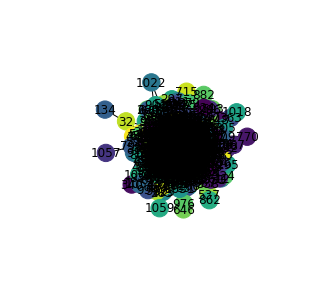

array([[ 0.263663,  0.237631,  0.518762,  1.      ],
       [ 0.283091,  0.110553,  0.431554,  1.      ],
       [ 0.626579,  0.854645,  0.223353,  1.      ],
       ..., 
       [ 0.271828,  0.209303,  0.504434,  1.      ],
       [ 0.267004,  0.004874,  0.329415,  1.      ],
       [ 0.14021 ,  0.665859,  0.513427,  1.      ]])

In [188]:
# plot graph

plot_utils.graph_plot(G, "graph")

In [187]:
# plot node space 2D

plot_utils.node_space_plot_2D(node_embedding, labels_pred)

In [183]:
# load g_mixture
g_mixture = joblib.load('./data/g_mixture.joblib') 

In [184]:
print("labels_true: ", labels_true)
print("labels_pred: ", labels_pred)

labels_true:  [0 1 0 ..., 1 0 0]
labels_pred:  [0 1 0 ..., 0 0 0]


In [185]:
print("labels_true:")
display(np.histogram(labels_true))

print("labels_pred:")
display(np.histogram(labels_pred))

labels_true:


(array([709,   0,   0,   0,   0,   0,   0,   0,   0, 351]),
 array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ]))

labels_pred:


(array([942,   0,   0,   0,   0,   0,   0,   0,   0, 118]),
 array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ]))

In [189]:
# NMI

metrics.normalized_mutual_info_score(labels_true, labels_pred)

0.00036547510221286272